# Análise Exploratória do Corpora UlyssesNER-BR (Fases 1 e 2)

In [105]:
import operator
import os
import random
import functools
import collections
import numpy as np
import matplotlib.pyplot as plt

random.seed(1999)

In [128]:
# DIR = "./dados-categorias/PLs/"  
# DIR = "./dados-tipos/PLs/"  
# DIR = "./dados-categorias/STs/"
DIR = "./dados-tipos/STs/"

In [129]:
all_files = [DIR+f for f in os.listdir(DIR)]  # Lista todos os arquivos do "DIR"
all_files[:10]

['./dados-tipos/STs/fase1-dia5-dados-conle_corrigido.conll',
 './dados-tipos/STs/2.conll',
 './dados-tipos/STs/fase1-dia2-dados-conle_corrigido.conll',
 './dados-tipos/STs/3.conll',
 './dados-tipos/STs/1.conll',
 './dados-tipos/STs/fase1-dia4-dados-conle_corrigido.conll',
 './dados-tipos/STs/5.conll',
 './dados-tipos/STs/fase1-dia3-dados-conle_corrigido.conll',
 './dados-tipos/STs/fase1-dia1-dados-conle_corrigido.conll',
 './dados-tipos/STs/4.conll']

In [130]:
def process_conll_file(location:str)->list:
    with open(location, "r") as f:
        data = f.read()
    data = data.split("\n\n")
    data = list(map(lambda x:x.split("\n"), data))
    data.pop()
    data = list(map(lambda x:[operator.itemgetter(*[0, -1])(y.split(" ")) for y in x], data))
    return data

def combine_files(locations:list)->list:
    extended = []
    for f in locations:
        extended.extend(process_conll_file(f))
    return extended

In [131]:
# process_conll_file transforma o arquivo .conll na estrutura de lista como abaixo
process_conll_file(all_files[0])[:3]

[[('Solicito', 'O'),
  (',', 'O'),
  ('parecer', 'O'),
  ('pela', 'O'),
  ('aprovação', 'O'),
  ('na', 'O'),
  ('CCJC', 'B-ORGgovernamental'),
  (',', 'O'),
  ('do', 'O'),
  ('PL', 'O'),
  ('em', 'O'),
  ('questão', 'O'),
  (',', 'O'),
  ('com', 'O'),
  ('urgência', 'O'),
  ('.', 'O'),
  (',', 'O'),
  (',', 'O'),
  (',', 'O'),
  (',', 'O'),
  (',', 'O'),
  (',', 'O'),
  (',', 'O'),
  (',', 'O'),
  (',', 'O'),
  (',', 'O'),
  (',', 'O'),
  (',', 'O'),
  (',', 'O'),
  (',', 'O'),
  (',', 'O')],
 [('Urgente', 'O'),
  ('(', 'O'),
  ('se', 'O'),
  ('possível', 'O'),
  ('o', 'O'),
  ('atendimento', 'O'),
  ('antes', 'O'),
  ('do', 'O'),
  ('período', 'O'),
  ('de', 'O'),
  ('recesso', 'O'),
  (')', 'O'),
  ('Prezados', 'O'),
  (',', 'O'),
  ('boa', 'O'),
  ('tarde', 'O'),
  ('!', 'O'),
  ('A', 'O'),
  ('pedido', 'O'),
  ('da', 'O'),
  ('deputada', 'B-PESSOAcargo'),
  ('_', 'O'),
  ('_', 'O'),
  ('PARLAMENTAR', 'B-PESSOAcargo'),
  ('_', 'O'),
  ('_', 'O'),
  (',', 'O'),
  ('solicito', 'O'),
 

In [132]:
# combine_files aplica a função process_conll_file para todos arquivos na lista all_files
all_data = combine_files(all_files)
random.shuffle(all_data)

In [133]:
def to_list(data:list)->list:
    return functools.reduce(operator.iconcat, data, [])

def split_words_n_tags(data:list)->tuple:
    words, tags = map(list, zip(*data))
    return words, tags

In [134]:
# to_list remove a hierarquia das sentenças, ou seja, os tokens tornam-se independentes um do outro
exemplo = [[("O", "X"), ("Cachorro", "Y")], [("O", "X"), ("Gato", "Y")]]
print(exemplo)
print(to_list(exemplo))

[[('O', 'X'), ('Cachorro', 'Y')], [('O', 'X'), ('Gato', 'Y')]]
[('O', 'X'), ('Cachorro', 'Y'), ('O', 'X'), ('Gato', 'Y')]


In [135]:
# split_words_n_tags retorna duas listas: Uma contendo todos os tokens do dataset e outra contendo 
#  suas respectivas tags respeitando a ordem.
print(split_words_n_tags(to_list(exemplo)))

(['O', 'Cachorro', 'O', 'Gato'], ['X', 'Y', 'X', 'Y'])


## Estatísticas

In [136]:
f"Número Total de Sentenças: {len(all_data)}"

'Número Total de Sentenças: 790'

In [137]:
# PL's são compostos de múltiplas sentenças, por isso a análise de sentenças é feita só para este corpus
if DIR=="./dados-categorias/PLs/" or DIR=="./dados-tipos/PLs/":
    # Análise do número de sentenças por projeto de lei
    tamanhos_pl = []
    for f in all_files:
        d = process_conll_file(f)
        tamanhos_pl.append(len(d))
    plt.boxplot(tamanhos_pl, labels=[""])
    plt.show()

    # Estimação pontual do tamanho médio de uma sentença de um projeto de lei
    media_pl = np.mean(tamanhos_pl)
    std_pl = np.std(tamanhos_pl)
    z_alpha = 1.96
    rng = (z_alpha * std_sent) / np.sqrt(len(tamanhos_pl))
    print(f"Número Médio de Sentenças por Projeto de Lei: {media_pl}")
    print(f"Intervalo de Confiança (alpha = 5%): {(media_pl-rng, media_pl+rng)}")
else:
    None

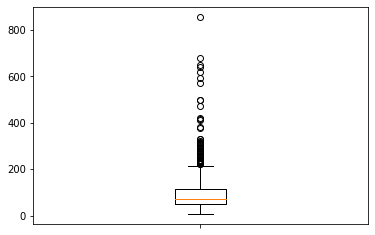

Número Médio de Tokens por sentença: 98.02658227848102
Intervalo de Confiança (alpha = 5%): (91.75322491407445, 104.29993964288758)


In [138]:
# Análise do número de tokens por sentenças
tamanhos_sent = []
for d in all_data:
    if len(d)>1:
        tamanhos_sent.append(len(d))
plt.boxplot(tamanhos_sent, labels=[""])
plt.show()

# Estimação pontual do número médio de tokens por sentença
media_sent = np.mean(tamanhos_sent)
std_sent = np.std(tamanhos_sent)
z_alpha = 1.96
rng = (z_alpha * std_sent) / np.sqrt(len(tamanhos_sent))
print(f"Número Médio de Tokens por sentença: {media_sent}")
print(f"Intervalo de Confiança (alpha = 5%): {(media_sent-rng, media_sent+rng)}")

In [139]:
all_pairs = to_list(all_data)
all_words, all_tags = split_words_n_tags(all_pairs)

In [140]:
f"Número de tokens no corpus: {len(all_words)}"

'Número de tokens no corpus: 77441'

In [141]:
f"Tamanho do Vocabulário: {len(set(all_words))}"

'Tamanho do Vocabulário: 11053'

In [142]:
# Daqui para cima não há diferença entre categorias e tipos

In [143]:
# Remoção dos prefixos B- e I- das tags
all_tags_limpo = []
for tag in all_tags:
    if tag=="O":
        all_tags_limpo.append(tag)
    elif tag.startswith("B-") or tag.startswith("I-"):
        all_tags_limpo.append(tag[2:])
    else:
        continue

In [144]:
f"Número de Tags: {len(set(all_tags_limpo))}"

'Número de Tags: 18'

In [145]:
# Número absoluto de aparições de cada tag no corpus
tag_hist = collections.Counter(all_tags_limpo)
tag_hist

Counter({'O': 68709,
         'ORGgovernamental': 874,
         'PRODUTOoutros': 754,
         'LOCALconcreto': 378,
         'DATA': 285,
         'FUNDapelido': 491,
         'FUNDlei': 3354,
         'FUNDprojetodelei': 302,
         'PESSOAindividual': 308,
         'PESSOAcargo': 407,
         'PRODUTOsistema': 86,
         'PESSOAgrupocargo': 165,
         'FUNDsolicitacaotrabalho': 231,
         'EVENTO': 79,
         'LOCALvirtual': 599,
         'PRODUTOprograma': 158,
         'ORGnaogovernamental': 257,
         'ORGpartido': 4})

In [146]:
# Estimação pontual das proporções de cada uma das tags (em latex)
prop = {key:(val/sum(tag_hist.values())) * 100 for key, val in tag_hist.items()}
prop = dict(sorted(prop.items(), key=lambda item: item[1]))
for key, val in prop.items():
    print(f"{key} & {val:.2f}\%\\\\ \hline")
    
eps = z_alpha * np.sqrt(1/(4*len(all_words)))
print(f"\n\nErro ao estimar a proporção (abordagem conservativa, alpha = 5%): {(eps * 100):.2f}%")

ORGpartido & 0.01\%\\ \hline
EVENTO & 0.10\%\\ \hline
PRODUTOsistema & 0.11\%\\ \hline
PRODUTOprograma & 0.20\%\\ \hline
PESSOAgrupocargo & 0.21\%\\ \hline
FUNDsolicitacaotrabalho & 0.30\%\\ \hline
ORGnaogovernamental & 0.33\%\\ \hline
DATA & 0.37\%\\ \hline
FUNDprojetodelei & 0.39\%\\ \hline
PESSOAindividual & 0.40\%\\ \hline
LOCALconcreto & 0.49\%\\ \hline
PESSOAcargo & 0.53\%\\ \hline
FUNDapelido & 0.63\%\\ \hline
LOCALvirtual & 0.77\%\\ \hline
PRODUTOoutros & 0.97\%\\ \hline
ORGgovernamental & 1.13\%\\ \hline
FUNDlei & 4.33\%\\ \hline
O & 88.72\%\\ \hline


Erro ao estimar a proporção (abordagem conservativa, alpha = 5%): 0.35%


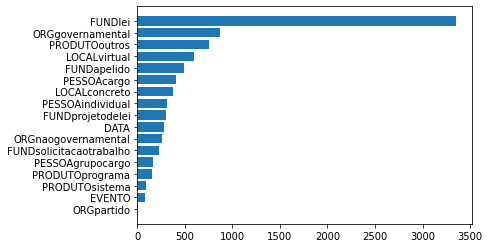

In [147]:
# Plot do número absoluto de aparições de cada uma das tags
tag_hist.pop("O")
tag_hist = dict(sorted(tag_hist.items(), key=lambda item: item[1]))
keys = tag_hist.keys()
vals = tag_hist.values()

fig, ax = plt.subplots()
ax.barh(range(len(keys)), tag_hist.values())
ax.set_yticks(range(len(keys)))
ax.set_yticklabels(keys)
plt.show()